<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Este taller guiado tiene como objetivo mostrar la implementación del algoritmo de Machine Learning Random Forest usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Entrenar y evaluar un modelo de regresión creado con Random Forest


## **1. Importar librería sklearn**

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 1.0

## **2. Cargar datos**

In [ ]:
# Carga de Diamonds desde seaborn
# Se usará más adelante para la regresión lineal

diamonds = sb.load_dataset("diamonds")
diamonds.shape

(53940, 10)

## **3. Exploración**

El dataset diamond tiene 53940 observaciones y 10 variables. La variable objetivo es el precio del diamante. El dataset tiene 3 variables cualitativas ordinales: cut, color y clarity. Que se listan a continuación, para más información de click [aquí](https://www.kaggle.com/shivam2503/diamonds).

<p align="center">
  <img src = "https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/diamond-depth-and-table.webp" alt = "Diamante" width = "50%">  </img>

| Variable | Descripción|
| ----------- | ----------- |
| carat | Peso en quilates |
| cut | Calificación de la talla (Fair, Good, Very Good, Premium, Ideal)|
| color | Escala de color desde D (mejor) a J (peor) |
| clarity | Medida de la claridad del diamante  |
|x|longitud en mm|
|y|ancho en mm|
|z|profundidad en mm|
| depth| Porcentaje profundidad total |
|table|Ancho de la parte más alta del diamante relativo al punto más ancho|
|price|precio del diamante en dólares estadounidenses|

**Notas**

* Un quilate equivale a 0.2 gramos.

* Los diamantes color D son los más traslucidos y raros.

* La escala de claridad es la siguiente, mide la cantidad de inclusiones que afectan la claridad de los diamantes. La escala IF es para los diamantes con mejor claridad.

> * IF: Internally Flawless
* VVS: Very Very Sligthly Included
* VS: Very Sligthly Included
* SI: Sligthly Included
* I: Included

$$ depth_{porcentaje} = \frac{z}{mean(x,y)} $$






In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Revisión de valores nulos

diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamonds.describe() # Resumen estadístico de las variables numéricas, note que a partir de x,y y z se calcula el porcentaje depth

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


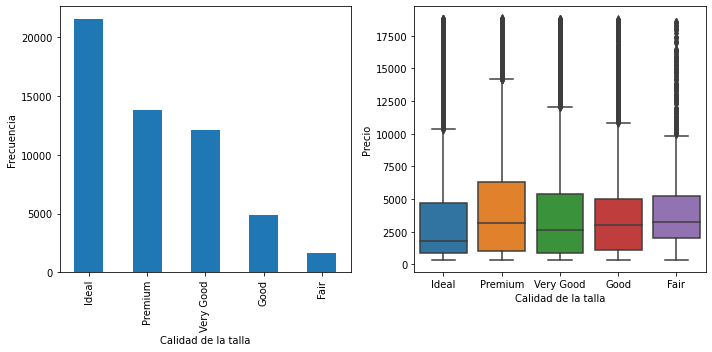

In [ ]:
#Distribución por calidad de talla
fig, ax = plt.subplots(1,2, figsize = (10,5))

diamonds['cut'].value_counts().plot(kind = 'bar', ax = ax[0])
ax[0].set_xlabel('Calidad de la talla')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(data = diamonds, x = 'cut', y = 'price', ax = ax[1])
ax[1].set_xlabel('Calidad de la talla')
ax[1].set_ylabel('Precio')

plt.tight_layout()

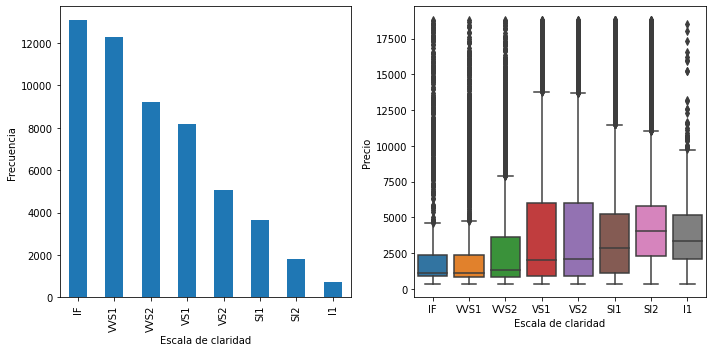

In [ ]:
#Distribución por claridad

fig, ax = plt.subplots(1,2, figsize = (10,5), sharex = True)

diamonds['clarity'].value_counts().plot(kind = 'bar', ax = ax[0])
ax[0].set_xlabel('Escala de claridad')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(data = diamonds, x = 'clarity', y = 'price', ax = ax[1])
ax[1].set_xlabel('Escala de claridad')
ax[1].set_ylabel('Precio')
plt.tight_layout()

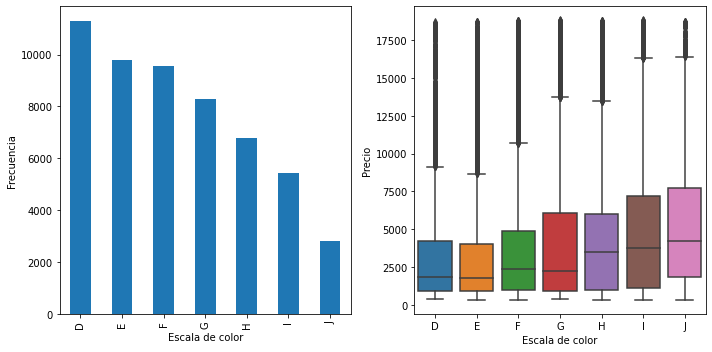

In [ ]:
#Distribución por color

fig, ax = plt.subplots(1,2, figsize = (10,5), sharex = True)

diamonds['color'].value_counts().plot(kind = 'bar', ax = ax[0])
ax[0].set_xlabel('Escala de color')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(data = diamonds, x = 'color', y = 'price', ax = ax[1])
ax[1].set_xlabel('Escala de color')
ax[1].set_ylabel('Precio')
plt.tight_layout()

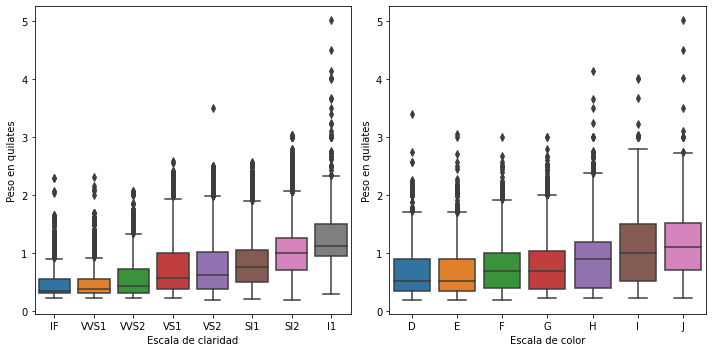

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.boxplot(data = diamonds, x = 'clarity', y = 'carat', ax = ax[0])
ax[0].set_xlabel('Escala de claridad')
ax[0].set_ylabel('Peso en quilates')
plt.tight_layout()

sns.boxplot(data = diamonds, x = 'color', y = 'carat', ax = ax[1])
ax[1].set_xlabel('Escala de color')
ax[1].set_ylabel('Peso en quilates')
plt.tight_layout()

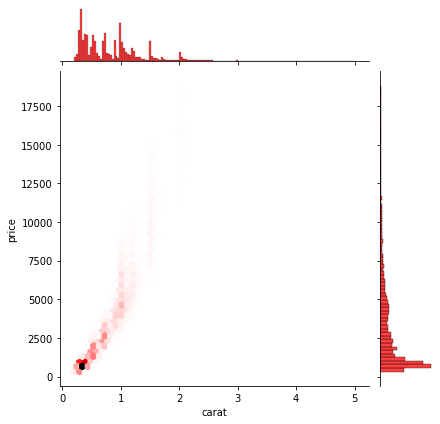

In [ ]:
## 

sns.jointplot(data = diamonds, x = 'carat', y = 'price', kind = 'hex', color = 'red')

## **4. Transformación de variables**

Para el caso del dataset diamonds se deben transformar las variables categóricas a variables dummy. Recuerde que hay 3 variables categóricas en el dataset, color, clarity and cut.

In [ ]:
# Filtramos el dataset diamonds y quitamos las variables x, y z
# Se convierten en dummies las variables categóricas
# Cut (5) + color (7) + clarity(8) + Numéricas(4) = 24 variables

diamonds_transf = pd.get_dummies(diamonds.iloc[:,0:7])
diamonds_transf.head()
# diamonds_transf.shape

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
diamonds_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  uint8  
 5   cut_Premium    53940 non-null  uint8  
 6   cut_Very Good  53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Fair       53940 non-null  uint8  
 9   color_D        53940 non-null  uint8  
 10  color_E        53940 non-null  uint8  
 11  color_F        53940 non-null  uint8  
 12  color_G        53940 non-null  uint8  
 13  color_H        53940 non-null  uint8  
 14  color_I        53940 non-null  uint8  
 15  color_J        53940 non-null  uint8  
 16  clarity_IF     53940 non-null  uint8  
 17  clarity_VVS1   53940 non-null  uint8  
 18  clarit

## **5. Partición del dataset en entrenamiento y prueba**


Para el dataset diamond

| Variable | Uso |
| ----------- | ----------- |
| carat | Predictora |
| cut | Predictora|
| color |Predictora |
| clarity | Predictora  |
| depth| Predictora |
|table|Predictora|
|price|Objetivo|

In [ ]:
# Se divide entre variables predictoras y objetivo
# Quitamos la variable precio para obtener el conjunto de variables predictoras

X = diamonds_transf.drop('price', axis = 1)

y = diamonds_transf['price']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (53940, 23)
Dimensiones de y: (53940,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30% 
    random_state = 4  # Semilla aleatoria que sirve para reproducibilidad
)

In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (37758, 23)
Dimensiones de y de entrenamiento: (37758,)

Dimensiones de X de prueba: (16182, 23)
Dimensiones de y de prueba: (16182,)


## **6. Modelamiento**

Haremos la regresión utilizando el algoritmo Random Forest discutido en clase.

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Importar el algoritmo de regresión

# Crear un objeto que va guardar la información del modelo
forest = RandomForestRegressor(n_estimators=100, #número de arboles dentro del bosque
                              max_depth=5, #aplicar pre-poda para los árboles del bosque
                              criterion = "squared_error", #selección de la función que mide la calidad de la división en cada rama
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              bootstrap=True, #selección aleatoria de las muestras para construir cada arbol
                              max_samples= 13000, #número máximo de muestras escogidas para cada árbol
                              max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              oob_score=True #usar o no out of bag samples para evaluar el modelo, Bagging
                               )
# error oob - out of bag

# Ajustar el modelo con los datos de entrenamiento - aprendizaje
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_samples=13000,
                      oob_score=True, random_state=0)

## **7. Evaluación del desempeño del modelo**

In [ ]:
# Realizamos predicciones usando el modelo forest que hemos entrenado tanto para l partición de entrenamiento como par ala de prueba

y_predict_test = forest.predict(X_test)
y_predict_train = forest.predict(X_train)

### **Error cuadrático medio**

Conocido por sus siglas en inglés MSE (Mean Squared Error). Es un estimador que mide el promedio de los errores al cuadrado, es decir, la diferencia entre el valor predicho y el real.

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación.

A menudo se emplea la Raíz del Error Cuadrático Medio (RMSE) para dar interpretación concorde a las unidades de trabajo.

$$ \text{RMSE}(y, \hat{y}) = \sqrt{\text{MSE}}$$

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_predict_test)
print('MSE en partición de prueba: {:3f}'.format(mse_test))


mse_train = mean_squared_error(y_train, y_predict_train)
print('MSE en partición de entrenamiento: {:3f}'.format(mse_train))


print('\nRMSE en partición de prueba: {:3f}'.format(np.sqrt(mse_test)))
print('RMSE en partición de entrenamiento: {:3f}'.format(np.sqrt(mse_train)))

MSE en partición de prueba: 5568698.568713
MSE en partición de entrenamiento: 5790224.095046

RMSE en partición de prueba: 2359.809011
RMSE en partición de entrenamiento: 2406.288448


### **Error absoluto medio**

Conocido por sus siglas en inglés MAE (Mean Absolute Error). Es un estimador que mide el promedio de los errores absolutos.

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_predict_test)
print('Coeficiente de determinación en prueba: {:3f}'.format(mae_test))


mae_train = mean_absolute_error(y_train, y_predict_train)
print('Coeficiente de determinación en entrenamiento: {:3f}'.format(mae_train))

Coeficiente de determinación en prueba: 1655.170840
Coeficiente de determinación en entrenamiento: 1680.190168


### **Coeficiente de determinación $R^{2}$**

El coeficiente de determinación representa la proporción de la varianza de y que ha sido explicado por las variables independientes del modelo. Provee una indicación de que tan bueno fue el ajuste además de indicar que tan bueno será el desempeño de las predicciones con nuevos datos. El mejor valor posible es 1, en el peor de los casos un modelo constante que siempre predice el mismo valor sin imporar el valor de x tendría un score de 0.

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación y $\bar{y}$ es el promedio de los valores observados para y.

In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_predict_test)
print('Coeficiente de determinación en prueba: {:3f}'.format(r2_test))


r2_train = r2_score(y_train, y_predict_train)
print('Coeficiente de determinación en entrenamiento: {:3f}'.format(r2_train))

Coeficiente de determinación en prueba: 0.640885
Coeficiente de determinación en entrenamiento: 0.640137


Este primero modelo explica solamente el 64% de la varianza del precio. ¿Considera que el modelo entrenado es bueno, es óptimo?

A continuación se muestran algunos atributos importantes del objeto forest.

In [ ]:
# Importancia de las caracteristicas usadas para crear el modelo
importances = forest.feature_importances_

print('Importancia de características\n\n{}'.format(importances))
print(np.sum(importances))

Importancia de características

[8.31094186e-01 7.91778868e-03 4.15307059e-02 6.22091176e-03
 8.50420286e-03 8.83454312e-04 1.04508332e-03 8.73886075e-04
 6.27009114e-03 1.44896868e-02 1.25755774e-03 8.06626906e-04
 3.85151540e-03 1.75701589e-02 9.66437669e-03 4.10630427e-03
 1.06216934e-02 4.39937440e-03 4.91723387e-04 7.01590798e-04
 1.38834711e-03 2.43690674e-02 1.94166667e-03]
1.0


Text(0, 0.5, 'Características')

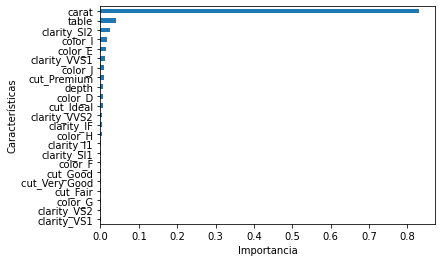

In [ ]:
importancia_1 = pd.Series(data = importances, index = X.columns.values)
importancia_1.sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Importancia')
plt.ylabel('Características')

## **8. Busqueda de hiperparámetros**

Vamos a experimentar con la cantidad de arboles presentes en el bosque, se aconseja usar escala exponencial en base 10. Usaremos el ciclo for para que recorra la tupla con los valores que deseamos y se los daremos como hiperparámetro al algoritmo. **La ejecución de la siguiente celda dura una hora y 8 minutos.** En la parte inferior se muestran los resultados para que no tenga que esperar tanto.

In [ ]:
# Se crea una lista vacia que va a almacenar las métricas durante el experimento
mse = []

for arboles in (10,100,1000,10000,100000):

  # Se crea la variable que contiene la información del modelo y se escogen los hiperparámetros
  forest = RandomForestRegressor(n_estimators = arboles, #número de arboles dentro del bosque
                              max_depth=5, #aplicar pre-poda para los árboles del bosque
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              bootstrap=True) #selección aleatoria de las muestras para construir cada arbol
  
  # Se entrena el modelo con los datos de entrenamiento        
  forest.fit(X_train,y_train)

  # Se hace una predicción a partir del conjunto de prueba
  y_pred = forest.predict(X_test)

  # Se calcula el mse para esa configuración
  a = mean_squared_error(y_test,y_pred)

  # Se guarda el resultado del mse en una lista llamada mse
  mse.append(a)  

In [ ]:
mse = [1347231.1945840367,  1338729.1620982857,  1337555.547157138,  1336960.7780563114,  1336935.0106402775]
numero_arboles = [10,100,1000,10000,100000]

Se puede observar que 10.000 es un buen número de árboles, hay una mejor importante respecto a 100 y muy poca perdida en comparación a 1000.000 donde el costo computacional es muy alto.

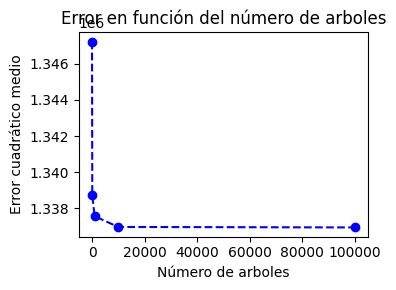

In [ ]:
fig = plt.figure(dpi = 100, figsize=(4,3))
plt.plot(numero_arboles,mse, marker = 'o',linestyle = '--', color = 'b')

plt.title('Error en función del número de arboles')
plt.xlabel('Número de arboles')
plt.ylabel('Error cuadrático medio')


Por último vamos a experimentar con la profundidad del bosque. Para asegurar que el entrenamiento sea más rápido vamos a quedarnos con 1000 arboles. Este experimento solo tarda 1 minuto y 45 segundos en ejecutarse.

In [ ]:
# Se crea una lista vacia que va a almacenar las métricas durante el experimento
mse_train = []
mse_test = []
r2_train = []
r2_test = []

for profundidad in (3,5,10,15,20,25):

  # Se crea la variable que contiene la información del modelo y se escogen los hiperparámetros
  forest = RandomForestRegressor(n_estimators = 1000, #número de arboles dentro del bosque
                              max_depth = profundidad, #aplicar pre-poda para los árboles del bosque
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              max_samples= 13000, #número máximo de muestras escogidas para cada árbol
                               criterion="squared_error", #selección de la función que mide la calidad de la división en cada rama
                              max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              bootstrap=True) #selección aleatoria de las muestras para construir cada arbol

                                
  # Se entrena el modelo con los datos de entrenamiento        
  forest.fit(X_train,y_train)

  # Se hace una predicción a partir del conjunto de prueba
  y_pred = forest.predict(X_test)
  y_pred2 = forest.predict(X_train)

  # Se calcula el mse y el r2 para esa configuración y se almacena
  mse_test.append(mean_squared_error(y_test,y_pred)) 
  r2_test.append(r2_score(y_test,y_pred))

  mse_train.append(mean_squared_error(y_train,y_pred2)) 
  r2_train.append(r2_score(y_train,y_pred2))

Se puede observar que la mejor profundidad se encuentra entre 10 y 15. Profundidades mayores a 15 implican un mayor costo computacional y la mejora en el desempeño es muy poca.

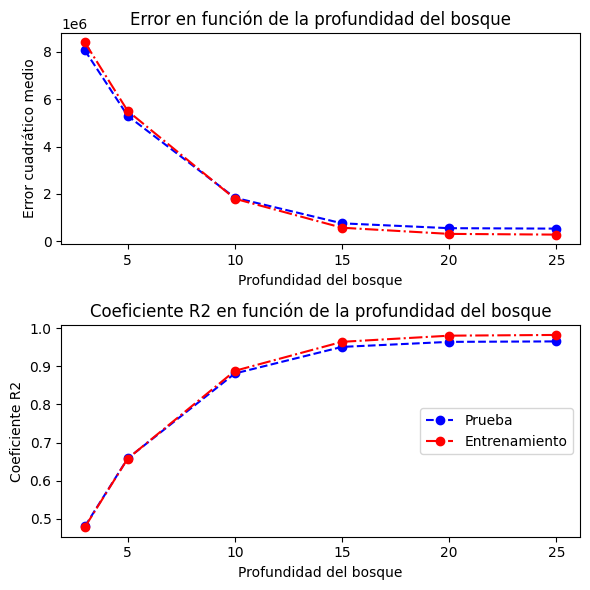

In [ ]:
#@title Dé click solo para ver como fue creada la visualización
profundidad = (3,5,10,15,20,25)

# Definición del canva con 2 gráficas apiladas
fig,axes = plt.subplots(2,1,dpi = 100, figsize=(6,6))

# Gráfica superior
axes[0].plot(profundidad,mse_test, marker = 'o',linestyle = '--', color = 'b')
axes[0].plot(profundidad,mse_train, marker = 'o',linestyle = '-.', color = 'r')

axes[0].set_title('Error en función de la profundidad del bosque')
axes[0].set_xlabel('Profundidad del bosque')
axes[0].set_ylabel('Error cuadrático medio')

# Gráfica inferior
axes[1].plot(profundidad,r2_test, marker = 'o',linestyle = '--', color = 'b')
axes[1].plot(profundidad,r2_train, marker = 'o',linestyle = '-.', color = 'r')


axes[1].set_title('Coeficiente R2 en función de la profundidad del bosque')
axes[1].set_xlabel('Profundidad del bosque')
axes[1].set_ylabel('Coeficiente R2')

# Ubicación de la leyenda
plt.legend(["Prueba", "Entrenamiento"], loc ="center right")

# Evita que los elementos se sobrelapen
plt.tight_layout()

Ahora, entrenemos el model óptimo de acuerdo a nuestra experimentación previa. Usaremos 10.000 árboles y profundidad máxima de 15. El entrenamiento de este modelo tarda solamente 3 minutos y 27 segundos.

In [ ]:
import time

# Crear un objeto que va guardar la información del modelo
forest = RandomForestRegressor(n_estimators=10000, #número de arboles dentro del bosque
                              max_depth=15, #aplicar pre-poda para los árboles del bosque
                              criterion = "squared_error", #selección de la función que mide la calidad de la división en cada rama
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              bootstrap=True, #selección aleatoria de las muestras para construir cada arbol
                              max_samples= 13000, #número máximo de muestras escogidas para cada árbol
                              max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              oob_score=True #usar o no out of bag samples para evaluar el modelo, Bagging
                               )
# error oob - out of bag

# Ajustar el modelo con los datos de entrenamiento - aprendizaje
%time forest.fit(X_train,y_train)

CPU times: user 3min 22s, sys: 4.22 s, total: 3min 26s
Wall time: 3min 27s


RandomForestRegressor(max_depth=15, max_features='sqrt', max_samples=13000,
                      n_estimators=10000, oob_score=True, random_state=0)

In [ ]:
importances = forest.feature_importances_
importances

array([0.84822389, 0.03304468, 0.02570097, 0.00412457, 0.00379365,
       0.00199932, 0.00192994, 0.00168407, 0.0041983 , 0.00549047,
       0.0029117 , 0.00271859, 0.00369285, 0.00679385, 0.00596665,
       0.00504767, 0.00615257, 0.0050263 , 0.00348043, 0.00348115,
       0.00537873, 0.01246406, 0.00669558])

Text(0, 0.5, 'Características')

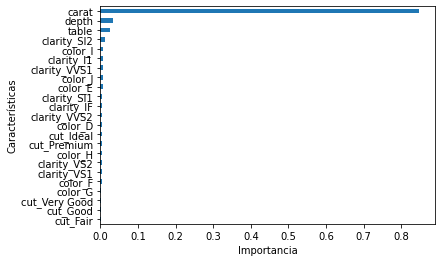

In [ ]:
importancia_2 = pd.Series(data = importances, index = X.columns.values)
importancia_2.sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Importancia')
plt.ylabel('Características')

## **Recursos adicionales**

* Artículo métricas de regesión

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

* Documentación métricas de regresión

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

* Documentación random forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* Información adicional

https://christophm.github.io/interpretable-ml-book/tree.html#tree

* Explicación en video del algoritmo Random Forest, subtitulos en español disponibles.

https://youtu.be/J4Wdy0Wc_xQ



## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*